Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [4]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


# Exploratory Data Analysis Section

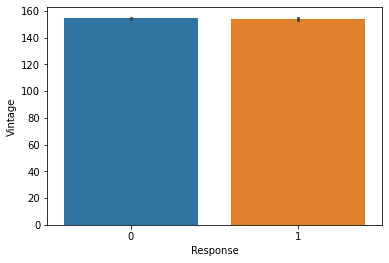

In [5]:
sns.barplot(data=train,x="Response",y="Vintage");

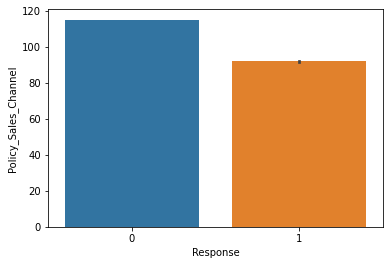

In [6]:
sns.barplot(data=train,x="Response",y="Policy_Sales_Channel");

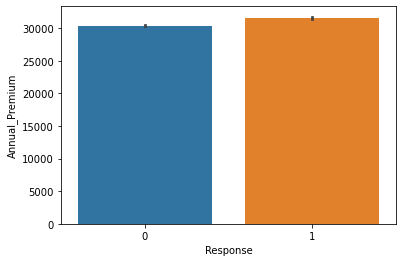

In [7]:
sns.barplot(data=train,x="Response",y="Annual_Premium");

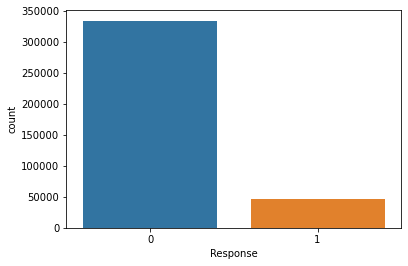

In [8]:
sns.countplot(data=train,x="Response");

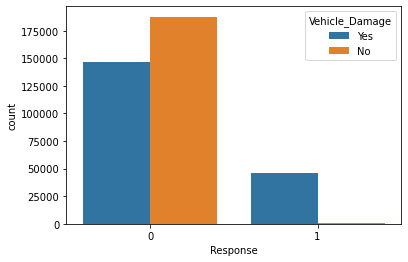

In [9]:
sns.countplot(data=train,x="Response",hue="Vehicle_Damage");

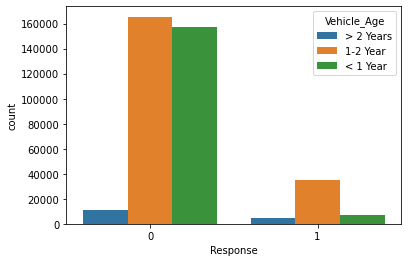

In [10]:
sns.countplot(data=train,x="Response",hue="Vehicle_Age");

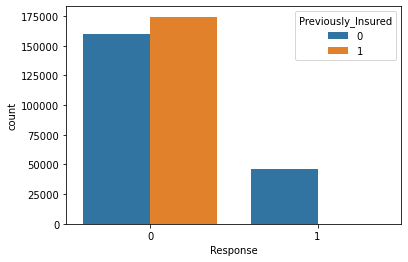

In [11]:
sns.countplot(data=train,x="Response",hue="Previously_Insured");

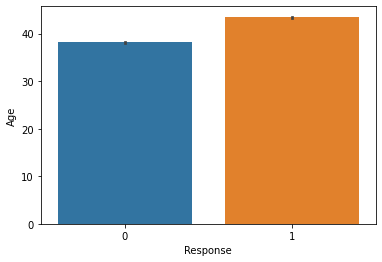

In [12]:
sns.barplot(data=train,x="Response",y="Age");

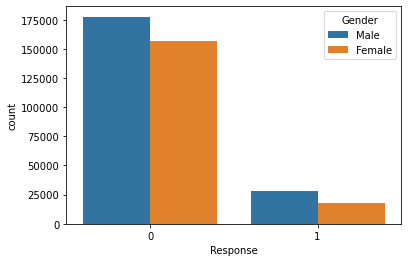

In [13]:
sns.countplot(data=train,x="Response",hue="Gender");

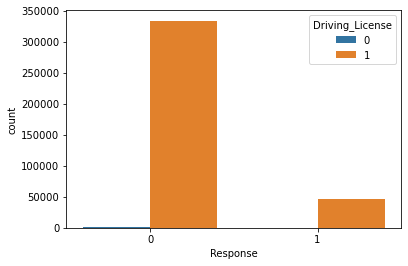

In [14]:
sns.countplot(data=train,x="Response", hue="Driving_License");

# Data preprocessing Section

In [15]:
train.nunique() # in case there is any attribute which has zero or one unique values we will drop it because it is not usable

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

As we can see there is no attribute which has 0 or 1 unique value 

In [16]:
#Let remove the attributes we don't need for our analysis
train.drop("id",axis=1,inplace=True)

In [17]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


# Let check for the uniqueness of our dataset attributes


In [18]:
train["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
train["Driving_License"].unique()

array([1, 0], dtype=int64)

In [20]:
train["Vehicle_Damage"].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
train["Vehicle_Age"].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

As we can see there is some attributes which contains qualitative data we need  to transform tham into quantitative before starting analysis.


In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [23]:
train["Gender"] = label_encoder.fit_transform(train["Gender"])
train["Gender"].unique()

array([1, 0])

In [24]:
train["Vehicle_Age"]=label_encoder.fit_transform(train["Vehicle_Age"])
train["Vehicle_Age"].unique()

array([2, 0, 1])

In [25]:
train["Vehicle_Damage"] = label_encoder.fit_transform(train["Vehicle_Damage"])
train["Vehicle_Damage"].unique()

array([1, 0])

In [26]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [27]:
train.dtypes

Gender                    int32
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

# Check if the output Variable is balanced 

0    334399
1     46710
Name: Response, dtype: int64

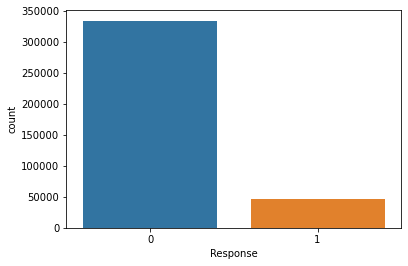

In [28]:
sns.countplot(train["Response"]);
train['Response'].value_counts()

As we can see the output variable is not balanced the people who responded no are more than the people who responded yes

In [29]:
from sklearn.utils import resample
df_majority = train[(train['Response']==0)]
df_minority = train[(train['Response']==1)]


In [30]:
#Now we are going to use upsampling techniques to balance the responce variable
df_minority_upsampled =resample(df_minority,
                                replace = True, #sample with replacement
                                n_samples = 334399,
                                random_state = 0 #reproducible results
                               )

In [31]:
#let combine majority class with upsampled class
df_upsampled = pd.concat([df_minority_upsampled,df_majority],ignore_index=True)

#Now we are going to use downsampling techniques to balance the responce variable
df_minority_upsampled1 =resample(df_majority,
                                replace = True, #sample with replacement
                                n_samples = len(df_minority),
                                random_state = 42
                               )

print(df_minority_upsampled1.shape)

print(df_minority.shape)

df_upsampled = pd.concat([df_minority_upsampled1,df_minority],ignore_index=True)

1    334399
0    334399
Name: Response, dtype: int64

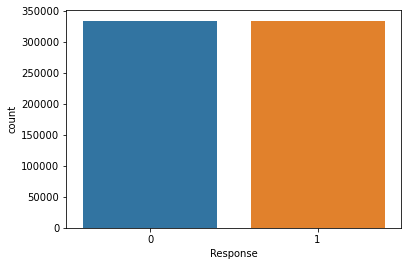

In [32]:
sns.countplot(df_upsampled['Response']);
df_upsampled['Response'].value_counts()

# Check for outliers

<AxesSubplot:xlabel='Age'>

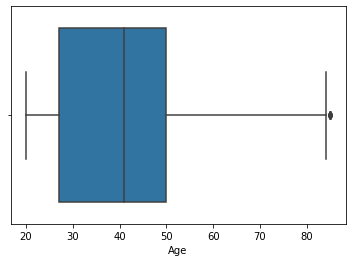

In [34]:
sns.boxplot(x=df_upsampled['Age'])

<AxesSubplot:xlabel='Annual_Premium'>

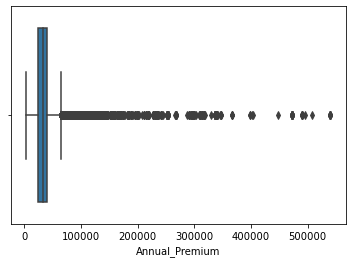

In [35]:
sns.boxplot(x=df_upsampled['Annual_Premium']);

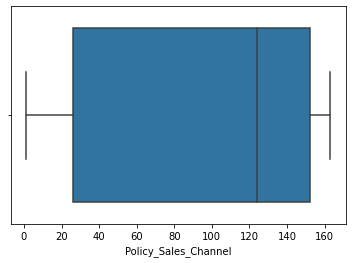

In [37]:
sns.boxplot(x=df_upsampled['Policy_Sales_Channel']);

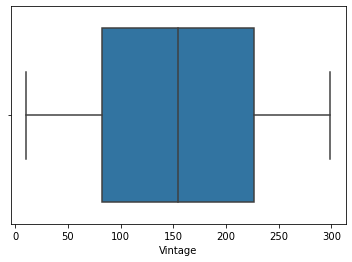

In [38]:
sns.boxplot(x=df_upsampled['Vintage']);

# Removing Outliers

In [39]:
import scipy.stats as stats

In [40]:
z=np.abs(stats.zscore(df_upsampled))# Z-score mathod
data=df_upsampled[(z<3).all(axis=1)]

# Data Correlation Analysis

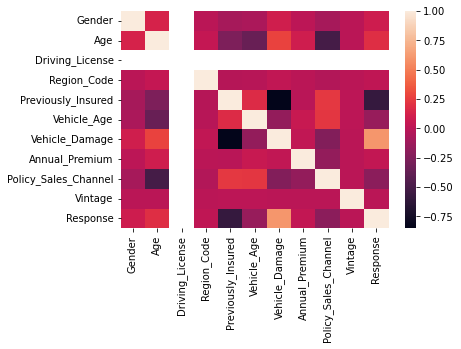

In [42]:
sns.heatmap(data.corr(),fmt='.2g');

In [44]:
data.drop('Driving_License',axis=1, inplace=True)


In [45]:
data.head()

,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,43,13.0,0,0,1,26950.0,26.0,266,1
1,0,60,24.0,0,0,1,2630.0,124.0,286,1
2,0,23,28.0,0,1,1,44214.0,152.0,258,1
3,1,43,28.0,0,0,1,35139.0,26.0,11,1
4,1,38,28.0,0,0,1,34115.0,26.0,45,1


# Modeling Section

In [47]:
X = data.drop('Response',axis=1)
Y = data['Response']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=20,random_state=0)

# Decision Tree Classifier

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [51]:
Y_pred = dtree.predict(X_test)
print('Accuracy Score:',round(accuracy_score(Y_test,Y_pred)*100,2),'%')

Accuracy Score: 95.0 %


In [52]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
print('F-1 Score :',(f1_score(Y_test,Y_pred)))
print('Precision Score :',(precision_score(Y_test,Y_pred)))
print('Recall Score : ',(recall_score(Y_test,Y_pred)))

F-1 Score : 0.9473684210526316
Precision Score : 0.9
Recall Score :  1.0


# Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [54]:
Y_predr = rfc.predict(X_test)
print('Accuracy Score:',round(accuracy_score(Y_test,Y_predr)*100,2),'%')

Accuracy Score: 95.0 %


In [55]:
print('F-1 Score :',(f1_score(Y_test,Y_predr)))
print('Precision Score :',(precision_score(Y_test,Y_predr)))
print('Recall Score : ',(recall_score(Y_test,Y_predr)))

F-1 Score : 0.9473684210526316
Precision Score : 0.9
Recall Score :  1.0


# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=0)
lr.fit(X_train,Y_train)

LogisticRegression(random_state=0)

In [57]:
Y_predl=lr.predict(X_test)
print('Accuracy Score:',round(accuracy_score(Y_test,Y_predl)*100,2),'%')

Accuracy Score: 60.0 %


In [58]:
print('F-1 Score :',(f1_score(Y_test,Y_predl)))
print('Precision Score :',(precision_score(Y_test,Y_predl)))
print('Recall Score : ',(recall_score(Y_test,Y_predl)))

F-1 Score : 0.5555555555555556
Precision Score : 0.5555555555555556
Recall Score :  0.5555555555555556


# Gaussian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB()

In [62]:
Y_predg = gnb.predict(X_test)
print('Accuracy Score:',round(accuracy_score(Y_test,Y_predg)*100,2),'%')

Accuracy Score: 70.0 %


In [63]:
print('F-1 Score :',(f1_score(Y_test,Y_predg)))
print('Precision Score :',(precision_score(Y_test,Y_predg)))
print('Recall Score : ',(recall_score(Y_test,Y_predg)))

F-1 Score : 0.7272727272727274
Precision Score : 0.6153846153846154
Recall Score :  0.8888888888888888
